# Zone Refining of Nickel with Copper impurities

Here we will consider the problem of Zone refining of Nickel. We will assume an initial impurity concentration of 10% Copper. We have derived an analytical solution for the composition profile after the first pass, but not for subsequent passes. For this, we will numerically simulate these passes.

To make things easier, we will consider that the melt zone is very small compared to the length of the rod, so small that we can consider the composition to be uniform across the melt zone length.

In [1]:
# import required libraries

import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

We will also import the Ni-Cu phase diagram to calculate the partition coefficient at $X_{Cu} = 0.1$

Partition coefficient = 0.8201969762048095


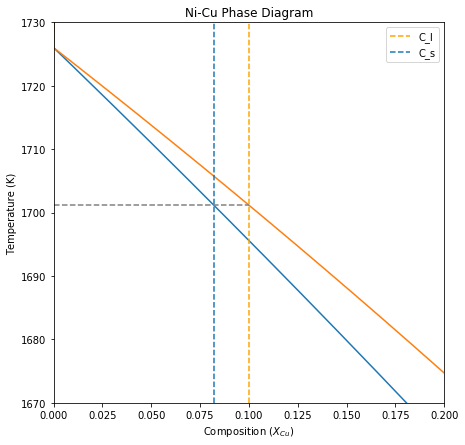

In [3]:
# import the phase diagram
phase_diag = np.genfromtxt('Ni-Cu-PhaseDiagram.csv',delimiter=',')

# Partition coefficient at our composition of interest

C_0 = 0.1
C_s = np.interp(C_0,np.flip(phase_diag[:,2],0),np.flip(phase_diag[:,1],0))
T_m = np.interp(C_0,np.flip(phase_diag[:,2],0),np.flip(phase_diag[:,0],0))

k = C_s/C_0
print("Partition coefficient = " + str(k))

# plot the phase diagram
fig, ax = plt.subplots(figsize = (7,7))

ax.set_ylabel('Temperature (K)')
ax.set_xlabel('Composition ($X_{Cu}$)')
ax.set_xlim(0,0.2)
ax.set_ylim(1670,1730)
ax.set_title('Ni-Cu Phase Diagram')
ax.plot(phase_diag[:,1],phase_diag[:,0])
ax.plot(phase_diag[:,2],phase_diag[:,0])
ax.axvline(0.1,0,(T_m-1670)/20,linestyle='--',color='orange',label='C_l')
ax.axvline(C_s,0,(T_m-1670)/20,linestyle='--',label='C_s')
ax.axhline(T_m,0,0.5,linestyle='--',color='gray')

ax.legend()

Alright, now that we know the partition coefficient (We will assume this does not vary appreciably with composition), we can now numerically solve the zone refining problem.

We can also compare the numerical results of the first pass with our analytical solution,

$$C_l = \frac{C_0}{k} \{ 1-(1-k)e^{\frac{-kx}{z}}\}$$

In [4]:
# We take a 0.5m long rod, and our heating volume is 1mm. 
# That gives us 500 divisions, so we define an array of 500 indices

comp = C_0*np.ones(500)

# We'll write the loop for a single pass

def one_pass(comp):
    
    C_l = comp[0]
    
    for i in range(len(comp)-1):
        
        comp[i] = k*C_l
        C_l = (1-k)*C_l + comp[i+1]
        
    comp[-1] = C_l
    
    return comp

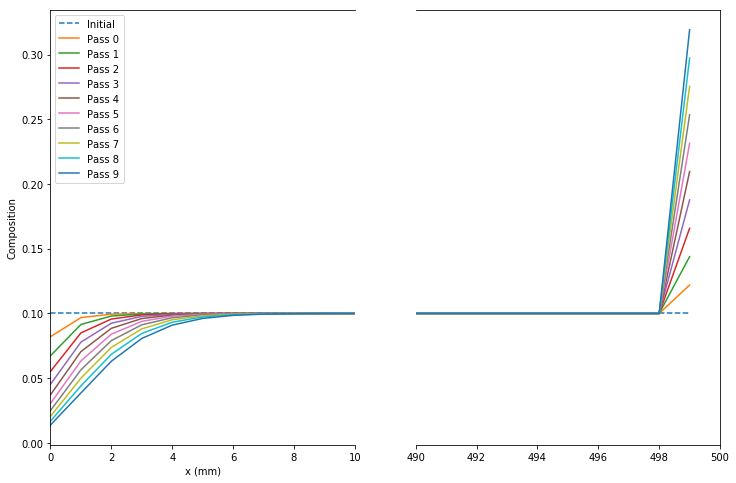

In [5]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (12,8))


passes = 10

ax1.plot(comp,label='Initial',linestyle='--')
ax2.plot(comp,label='Initial',linestyle='--')

ax1.set_xlim(0,10)
ax2.set_xlim(490,500)

ax2.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    right=False,      # ticks along the bottom edge are off
    left=False,         # ticks along the top edge are off
    labelleft=False) #

ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax1.set_xlabel('x (mm)')
ax1.set_ylabel('Composition')

comp_new = np.copy(comp)

for i in range(passes):
    
    comp_new = one_pass(comp_new)
    ax1.plot(comp_new, label='Pass '+ str(i))
    ax2.plot(comp_new, label='Pass '+ str(i))

ax1.legend(loc=2)

Now let's compare our numerical solution to the analytical solution for one pass

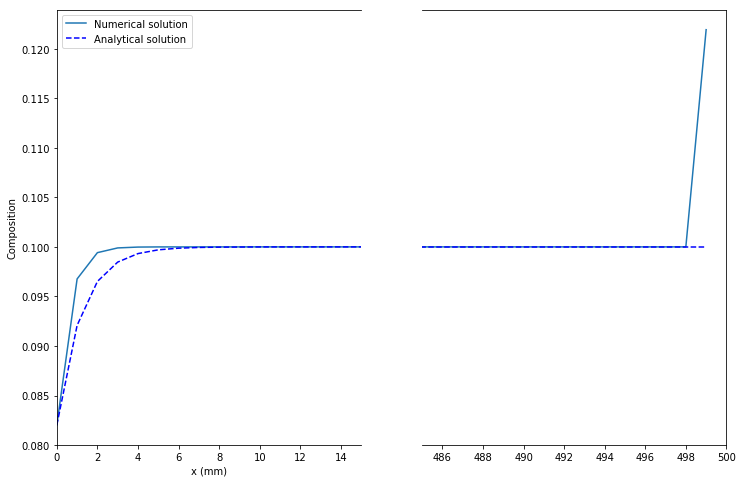

In [6]:
def comp_soln(i):
    
    return C_0 * (1-(1-k)*np.exp(-k*i))


fig, (ax1,ax2) = plt.subplots(1,2, figsize = (12,8))


passes = 10

ax1.set_xlim(0,15)
ax2.set_xlim(485,500)

ax2.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    right=False,      # ticks along the bottom edge are off
    left=False,         # ticks along the top edge are off
    labelleft=False) #

ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax1.set_xlabel('x (mm)')
ax1.set_ylabel('Composition')



num_soln = one_pass(comp)
anal_soln = np.array([comp_soln(i) for i in range(500)])

ax1.plot(num_soln, label='Numerical solution')
ax1.plot(anal_soln,linestyle='--', color='Blue', label='Analytical solution')

ax2.plot(num_soln, label='Numerical solution')
ax2.plot(anal_soln,linestyle='--', color='Blue', label='Analytical solution')

ax1.legend(loc=2)